# Author :- Nandan Kakadiya

# Data Science & Business Analytics Intern

# GRIP APRIL 2021

# Task-2 : Prediction using Unsupervised ML

In [1]:
#let's import all the necessary libraries to load the dataset
import pandas as pd

we can import Iris dataset with the help of Sklearn library but here link to dataset is given and i have downloaded the dataset in my local system , put the csv file in the same working directory where you have opened jupyter notebook,so we will load with the help of pandas 


In [2]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


here we will drop the Species column because it is our target variable and in Unsupervised learning we don't want target variables

In [5]:
x=df.drop(['Species','Id'],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


also we don't need id too because it isn't giving any information about Species

In [6]:
#let's check is there any null values or not
x.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [7]:
import matplotlib.pyplot as plt

now we will use clustering method

here we are going to use k-means clustering method 

first we will have to find optimal numbers of cluster in dataset

we can do this  with the help of elbow method

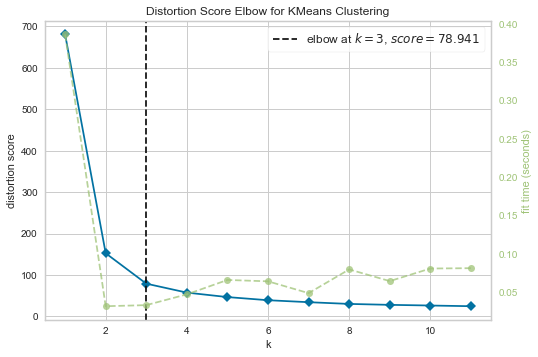

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
#Elbow Method for K means
# let's import ElbowVisualizer and KMeans model for clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans() #initialize the model
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,12), timings= True)
visualizer.fit(x)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

from the bove model it is clear that the optimum numbers of cluster is here 3

elbow is found at 3

In [9]:
#now apply kmeans to dataset where cluster is 3

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300 #max number of itertion of algo in single run  
                , n_init=15, #num of time algo will run with defernt center seed points
                random_state=0)
pred_y = kmeans.fit_predict(x)

In [11]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [12]:
#let's separate all the cluster acording to y_pred

In [13]:
cl1 = x[pred_y == 0]

In [14]:
cl2= x[pred_y == 1]
cl3= x[pred_y == 2]

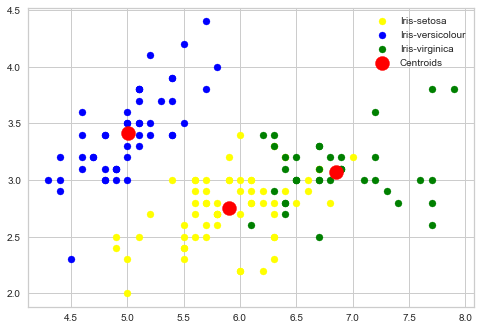

In [15]:
plt.scatter(cl1.iloc[:,0], cl1.iloc[:,1],  c = 'Yellow', label = 'Iris-setosa')
plt.scatter( cl2.iloc[:,0], cl2.iloc[:,1], c = 'blue', label = 'Iris-versicolour')
plt.scatter( cl3.iloc[:,0], cl3.iloc[:,1], c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],c = 'red', s = 200, label = 'Centroids')
plt.legend()

This graph we have ploted with the help of first two columns which are SepalLengthCm and SepalWidthCm we can also plot the graph 
with other any two columns combination like PetalLengthCm and PetalWidthCm

from the above graph we can see that there are many outliers present in green and yellow color

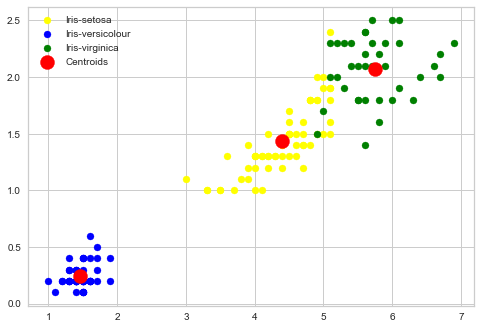

In [16]:
plt.scatter(cl1.iloc[:,2], cl1.iloc[:,3],  c = 'Yellow', label = 'Iris-setosa')
plt.scatter( cl2.iloc[:,2], cl2.iloc[:,3], c = 'blue', label = 'Iris-versicolour')
plt.scatter( cl3.iloc[:,2], cl3.iloc[:,3], c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3],c = 'red', s = 200, label = 'Centroids')
plt.legend()

this graph shows good clusters